In [1]:
#python basic libs
import os;
from os.path import join as pathjoin;
import zipfile;

import re;
import random;
import json;
from collections import defaultdict;
from pprint import pprint
from time import time

In [2]:
#data analysis libs
import numpy as np;
import pandas as pd;
from pandas.plotting import scatter_matrix;
import matplotlib.pyplot as plt;

import seaborn as sns;

In [3]:
#machine learning libs
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_selection;

#preprocessing and transformation
from sklearn import preprocessing;
from sklearn.preprocessing import MaxAbsScaler;
from sklearn.decomposition import PCA;

from sklearn.base import BaseEstimator, ClassifierMixin

#classifiers
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


#
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#model valuation
from sklearn.model_selection import train_test_split;
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score;

In [4]:
from IPython.display import Markdown, display, HTML

In [5]:
!conda install -c anaconda beautifulsoup4 --yes

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.4                |           py36_0         1.7 MB  anaconda
    ------------------------------------------------------------
                                           Total:         1.7 MB

The following packages will be UPDATED:

  conda                                        4.6.2-py36_0 --> 4.6.4-py36_0



conda-4.6.4          | 1.7 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [6]:
import nltk
from bs4 import BeautifulSoup

In [7]:
import sqlite3

In [8]:
dbpath = r'/Users/joseeleandrocustodio/pythonWorkspace/lyrics.db'

In [9]:
def runQuery(query):
    with  sqlite3.connect(dbpath) as conn:
        df = pd.read_sql_query(query,conn);
    return df;

In [10]:
runQuery('''
select
    genre,
    count(distinct(songHtml)) as songs,
    count(distinct(compositor)) as compositor
from lyrics
where
    length(songHtml) > 1000
    and length(trim(compositor)) >1
    and compositor not like '%/%'
    and compositor not like '%,%'
group by genre
having songs > 100 and compositor > 10
order by compositor desc, songs desc
''')

,genre,songs,compositor
0,Pop,2046,705
1,Sertanejo,1174,542
2,Gospel/Religioso,1723,525
3,Pop Rock,1873,485
4,Axé,778,421
5,Folk,1807,386
6,Forró,682,324
7,Soul,700,306
8,Rock and Roll,975,263
9,MPB,876,239


In [11]:
runQuery('''
select
    compositor,
    count(distinct(title)) as cnt_song,
    count(distinct(genre)) as cnt_genre,
    round(avg(exbibitions),0) as exbibitions
from lyrics
where
    compositor not like '%/%'
    and length(compositor) > 0
    and length(replace(songHTML,' ','')) > 1000
    and genre <> 'Gospel/Religioso'
group by compositor
having cnt_song > 20
order by  cnt_song desc
''')

,compositor,cnt_song,cnt_genre,exbibitions
0,Túlio Mourão,204,12,8799.0
1,Alejandro Sanz,101,1,65993.0
2,Taylor Swift,82,3,186766.0
3,Elvis Costello,81,2,784.0
4,Bob Marley,67,8,104863.0
5,Joni Mitchell,66,6,4454.0
6,Jörgen Elofsson,66,10,13429.0
7,Michael Jackson,65,8,121931.0
8,Chico Buarque,64,8,138535.0
9,Luiz Gonzaga,61,9,65662.0


In [390]:
df = runQuery('''
select
    rowid,
    compositor,
    artist,
    genre,
    title,
    songHtml
from lyrics
where
    compositor not like '%/%'
    and compositor not like '%,%'
    and length(compositor) > 0
    and compositor in (select distinct compositor from lyrics group by compositor,genre having count(*)>7)
    and length(replace(songHTML,' ','')) > 1000
    and genre not in ('Gospel/Religioso', 'Desconhecido','Alternativo', 'Infantil', 'Eletrônica',
    'Instrumental', 'K-Pop/K-Rock','Fado', 'Marchas/Hinos')
''')

In [391]:
len(df)

7734

In [392]:
df.songHtml = df.songHtml.apply(lambda x:BeautifulSoup(x).get_text())
df.head()

,rowid,compositor,artist,genre,title,songHtml
0,678,Samuel Rosa,Skank,Pop Rock,Do Ben,Sua mão direita vale ouro\nQue trouxe o novo s...
1,681,Caetano Veloso,Skank,Pop Rock,Beleza Pura,Não me amarra\nDinheiro não\nMas formosura\nDi...
2,686,Samuel Rosa,Skank,Pop Rock,Algo Parecido,Escorre o tempo que seguro e cabe em minhas mã...
3,727,Túlio Mourão,Skank,Pop Rock,Tanto (I Want You),Coveiros gemem tristes ais\nE realejos ancestr...
4,728,Bob Dylan,Skank,Pop Rock,I Want You,The guilty undertaker sighs\nThe lonesome orga...


#  detectando o idioma  através das stopswords 

In [393]:
def readStopWords():
    with open("/Users/joseeleandrocustodio/dataScienceNotebook/PANAA2018/2019/stopwords-all.json",'r') as f:
        stopwords = json.load(f)
    langKeys = np.array(sorted(stopwords.keys()));
    stopwords = [' '.join(stopwords[k]) for k in langKeys]  #returning as a document for being used on countVect
    return langKeys, stopwords;

langKeys, stopwords = readStopWords()

In [394]:
counterStopWords = CountVectorizer(
    analyzer='word',
    binary=True
).fit(stopwords)

In [395]:
stopRep = counterStopWords.transform(stopwords)
docRep  = preprocessing.normalize(counterStopWords.transform(df.songHtml.values)>0,norm='l1')

In [396]:
print(docRep.shape)
print(stopRep.shape)

(7734, 10485)
(50, 10485)


In [397]:
predLang = docRep.dot(stopRep.T)

In [398]:
print(predLang.min(), predLang.max())

0.0 1.0000000000000022


In [399]:
predicted = langKeys[predLang.argmax(axis=1)].flatten()

In [400]:
df['lang']=predicted

In [401]:
df[['rowid','lang']].groupby('lang').count().sort_values('rowid',ascending=False).T

lang,en,pt,es,fr,it,sl,de,nl,fi,ha,sv,no,ca,id,cs,da,gl
rowid,4405,2749,427,102,19,7,6,4,4,3,2,1,1,1,1,1,1


## filtering PT, EN e ES

In [528]:
df=df[df.lang.isin(['en','pt'])];
df[['rowid','lang']].groupby('lang').count().sort_values('rowid',ascending=False).T

lang,en,pt
rowid,4063,2364


# detectando músicas repetidas (cosseno >0.95)

In [529]:
counts = TfidfVectorizer(
    analyzer='word',
    max_df=0.7,
    min_df=10
).fit_transform(df.songHtml.values)

In [530]:
from sklearn.metrics import pairwise_distances

In [531]:
dist = 1-pairwise_distances(counts,metric='cosine',n_jobs=-1)

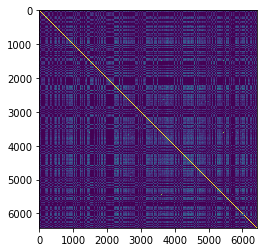

In [532]:
plt.imshow(dist);

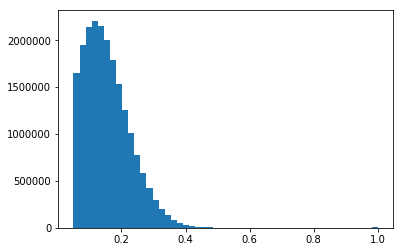

In [533]:
plt.hist(dist.flatten()[dist.flatten()>0.05],bins=50);

In [534]:
dups = [];
for i in range(len(dist)):
    for j in range(i):
        if dist[i,j] >0.7:
            dups.append([i,j,dist[i,j]]) 

In [535]:
len(dups)

241

In [536]:
i=100;
display(HTML(
 "<table>"
"<tr><td colspan='2'>"+str(dups[i][2])+"</td></tr>"
 "<tr><td>"  + df.iloc[dups[i][0]].compositor+"</td><td>" + df.iloc[dups[i][1]].compositor+"</td></tr>"+
 "<tr><td>"  + df.iloc[dups[i][0]].title+"</td><td>" + df.iloc[dups[i][1]].title+"</td></tr>"+
 "<tr><td>"  + df.iloc[dups[i][0]].songHtml.replace('\n','<br>')+"</td><td>" + df.iloc[dups[i][1]].songHtml.replace('\n','<br>')+"</td></tr>"+
 "</table>"
)
)


In [537]:
drop =[]
for d  in dups:
    if d[2]>0.95:
        drop.append(d[1]);
    elif d[2]>0.7:
        if df.iloc[d[0]].compositor == df.iloc[d[1]].compositor :
            drop.append(d[1]);
        elif df.iloc[d[0]].title == df.iloc[d[1]].title:
            drop.append(d[1]);
drop = list(set(drop));
len(drop)

5

In [538]:
print(len(df))
df.index = np.arange(len(df));
df.drop(index=drop,inplace=True)
del drop;
print(len(df))

6427
6422


In [539]:
df[['lang','rowid']].groupby(['lang']).count()

,rowid
lang,
en,4059
pt,2363


In [540]:
compositorEstilo = df[['lang','compositor','rowid']].groupby(['lang','compositor']).count()

In [541]:
compositorEstilo.reset_index(inplace=True)
compositorEstilo.rename(columns={'rowid':'cnt'},inplace=True)

In [542]:
compositorEstilo.head()

,lang,compositor,cnt
0,en,3OH!3,9
1,en,A. Young,2
2,en,Aaron Marsh,10
3,en,Adam Levine,13
4,en,Adele Adkins,5


In [543]:
compositorEstilo = compositorEstilo[compositorEstilo.cnt >=15]

In [544]:
print(len(df),len(compositorEstilo),compositorEstilo.cnt.sum())

6422 119 3472


In [545]:
compositorEstilo = df.merge(compositorEstilo,how='inner', on=['compositor','lang'])

In [546]:
print(len(df),len(compositorEstilo))

6422 3472


In [547]:
compositorEstilo

,rowid,compositor,artist,genre,title,songHtml,lang,cnt
0,1233,Luiz Gonzaga,Gonzaguinha,MPB,"Diga Lá, Coração",São coisas dessa vida tão cigana\nCaminhos com...,pt,53
1,1246,Luiz Gonzaga,Gonzaguinha,MPB,Cabeça,Cabeça que eu tenha sempre\npara sempre lembra...,pt,53
2,1259,Luiz Gonzaga,Gonzaguinha,MPB,Deixa Dílson e Vamos Nélson,Essa aqui vai pra você\nTá por aí pelos palcos...,pt,53
3,1261,Luiz Gonzaga,Gonzaguinha,MPB,O Começo,As paredes do quarto ainda derramam\nAs histór...,pt,53
4,1281,Luiz Gonzaga,Gonzaguinha,MPB,O Trem,"Uma prece a quem passa, rosto ereto\nPasso cer...",pt,53
5,1288,Luiz Gonzaga,Gonzaguinha,MPB,Moleque,"No tiro, estilingue, bodoque\nO teco, o toque,...",pt,53
6,1291,Luiz Gonzaga,Gonzaguinha,MPB,Dias de Santos e Silvas,O dia subiu sobre a cidade\nQue acorda e se põ...,pt,53
7,1300,Luiz Gonzaga,Gonzaguinha,MPB,"Um Abraço Terno Em Você, Viu, Mãe?",Eu olhei a terra ardendo \nQual a fogueira de ...,pt,53
8,1310,Luiz Gonzaga,Gonzaguinha,MPB,Nem o Pobre Nem o Rei,Eu perguntei perguntei e perguntei\nMuita gent...,pt,53
9,1318,Luiz Gonzaga,Gonzaguinha,MPB,Corações Marginais,"Eles já estão ficando, eles já estão dormindo,...",pt,53


In [625]:
outputFolder = '/Users/joseeleandrocustodio/dataScienceNotebook/PANAA2018/AvaliacaoPT';

In [626]:
import shutil
shutil.rmtree(outputFolder)
os.mkdir(outputFolder)

In [627]:
def removeNames(songs,compositor,artist):
    nameParts = set(compositor.split() +artist.split());
    for i in range(len(songs)): 
        for n in nameParts:
            if len(n.strip()) <= 3:
                continue;
            songs[i] = songs[i].replace(n," #PARTS# ");

In [628]:
np.random.seed(123456);
random.seed(123456);

problems =[];
_id = 1;
collections = [];
for lang in compositorEstilo.lang.unique():
    for n_authors in [5,10,15,20,30]:
        problName = 'problem%05d'%_id;
        collections.append(
            { "problem-name": problName, "language": lang, "encoding": "UTF-8" }
        )
        _id+=1;
        
        if not os.path.exists(pathjoin(outputFolder,problName)):
            os.mkdir(pathjoin(outputFolder,problName));
            
        problemInfo = {"unknown-folder": "unknown","candidate-authors": []};
        
        
        subset = (compositorEstilo[compositorEstilo.lang == lang])[['compositor','rowid']]\
            .groupby(['compositor']).count()\
            .sort_values('rowid',ascending=False).reset_index()\
            .compositor.values;
        
        #randomly selecting
        np.random.shuffle(subset);
        subset = subset[0:n_authors];
        
        temp = compositorEstilo[compositorEstilo.compositor.isin(subset)];
        
        unkownText = [];
        for i,compositor in enumerate(subset.tolist()):
            candidateName = 'candidate%05d'%(i+1);
            problemInfo['candidate-authors'].append({"author-name": candidateName});
            
            candidateFolder = pathjoin(outputFolder,problName,candidateName)
            
            if not os.path.exists(candidateFolder):
                os.mkdir(candidateFolder);
                
            songs = temp[temp.compositor == compositor].songHtml.values[0:30];
            artists = ' '.join(set(temp[temp.compositor == compositor].artist.values[0:30]));
            
            removeNames(songs,compositor,artists);

            
            split = int(len(songs)*0.7);
            
            for j,s in enumerate(songs[0:split]):
                with open(pathjoin(candidateFolder,"known%05d.txt"%(j+1)),"w") as f:
                    f.write(s);
            for j,s in enumerate(songs[split:]): 
                unkownText.append([candidateName,s])    
        
        #writing shuffed unknown texts and the ground truth
        unknownFolder = pathjoin(outputFolder,problName,'unknown');
        random.shuffle(unkownText);
        
        if not os.path.exists(unknownFolder):
            os.mkdir(unknownFolder);
            
        gt = []
                    
        for i,u in enumerate(unkownText):
            filename = "unknown%05d.txt" %(i+1);
            with open(pathjoin(unknownFolder,filename),"w") as f:
                f.write(u[1])
            gt.append({"unknown-text": filename,"true-author": u[0]})
        
        
        with open(pathjoin(outputFolder,problName,'ground-truth.json'),"w") as f:
            json.dump({
                "ground_truth":gt
            },f,indent=4)
        
        
        with open(pathjoin(outputFolder,problName,"problem-info.json"),"w") as f:
                json.dump(problemInfo,f)
        

with open(pathjoin(outputFolder,"collection-info.json"),"w") as f:
    json.dump(collections,f,indent=4)